## CSP 304: Machine Learning Lab (Spring 2023)
# Homework 0

Name: Samarth Bhatt <br>
College ID: 2020KUCP1068 <br>
Lab Batch: A3
<br>
<br>
<br>
<br>

# Sample Dataset (missing values)

Arrhythmia Dataset: https://archive.ics.uci.edu/ml/datasets/Arrhythmia

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

csvdata = pd.read_csv('./arrhythmia.data', header=None)

npdata = np.array(csvdata)[:, :15]
         
columns = [
    'Age',
    'Sex',
    'Height',
    'Weight', 
    'QRS duration',
    'P-R interval', 
    'Q-T interval',
    'T interval',
    'P interval',
    'QRS',
    'T',
    'P', 
    'QRST', 
    'J',
    'Heart Rate'
]

data = DataFrame(npdata, columns=columns)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 452
Number of attributes = 15


,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart Rate
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?


# Missing Values

### Replacing missing values with NaN

In [2]:
data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 452
Number of attributes = 15
Number of missing values:
	Age: 0
	Sex: 0
	Height: 0
	Weight: 0
	QRS duration: 0
	P-R interval: 0
	Q-T interval: 0
	T interval: 0
	P interval: 0
	QRS: 0
	T: 8
	P: 22
	QRST: 1
	J: 376
	Heart Rate: 1


### Replacing missing values (NaN) with median

In [3]:
data = data.drop(['J'], axis=1)

column_P = data['P']

print('Before replacing missing values:')
print(column_P[50:60])
column_P = column_P.fillna(int(column_P.median()))

print('\nAfter replacing missing values:')
print(column_P[50:60])

data['P'] = column_P.copy()

Before replacing missing values:
50     63
51     55
52     55
53     62
54    NaN
55     36
56     55
57     61
58     66
59    NaN
Name: P, dtype: object

After replacing missing values:
50    63
51    55
52    55
53    62
54    56
55    36
56    55
57    61
58    66
59    56
Name: P, dtype: object


### Discarding rows with missing values

In [4]:
print('Number of rows in original data = %d' % (data.shape[0]))

data = data.dropna()
print('Number of rows after discarding missing values = %d' % (data.shape[0]))

for label in ['T', 'P', 'QRST', 'Heart Rate']:
    data[label] = data[label].astype(int)

Number of rows in original data = 452
Number of rows after discarding missing values = 442


# Outliers

### Visualising outliers with box plot

<Axes: >

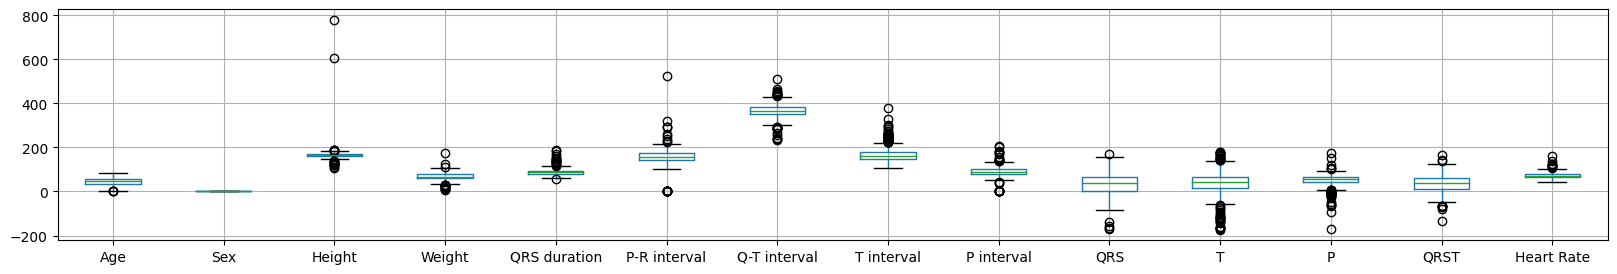

In [5]:
%matplotlib inline

data.boxplot(figsize=(20,3))

## Standarization (Z -score)

In [6]:
Z = (data - data.mean()) / data.std()
Z[20:25]

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,Heart Rate
21,-0.071427,-1.108844,0.075556,-0.058608,0.063079,-0.723155,-0.939916,0.201815,-0.449262,1.027989,0.723788,0.612479,1.189380,-0.606213
22,-0.617843,0.899800,-0.350547,0.421110,-1.163170,-0.501786,-0.094169,-0.022170,-0.295090,0.612659,0.338370,-0.161397,0.637139,0.186740
23,0.657127,0.899800,-0.030970,-0.538327,-0.905012,0.051636,1.174451,-0.750122,0.090341,-0.655191,-0.467503,0.295894,-0.881525,-0.389953
24,-0.374991,0.899800,-0.350547,-0.778186,-0.453236,-0.324691,0.630756,-0.582133,-0.295090,0.394064,-0.344870,1.949174,0.140122,-0.462040
25,-0.132140,-1.108844,0.075556,0.720935,1.289328,-0.590333,0.449525,0.705781,-1.143038,-1.485851,1.319433,3.672806,-0.826301,-0.822474


### Removing outliers using z score

In [7]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))
data = data.loc[(Z > -3).all(axis = 1) & (Z <= 3).all(axis = 1),:]
print('Number of rows after discarding missing values = %d' % (data.shape[0]))

Number of rows before discarding outliers = 442
Number of rows after discarding missing values = 374


### Visualising after outlier removal

<Axes: >

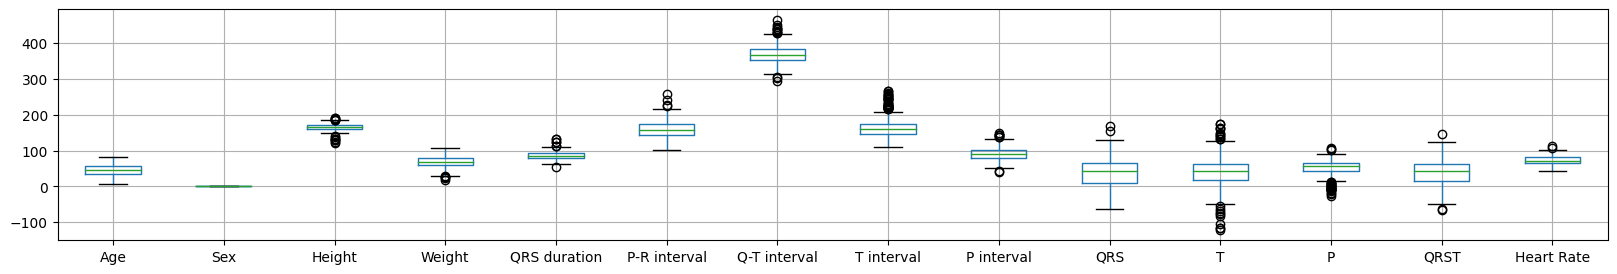

In [8]:
%matplotlib inline

data.boxplot(figsize=(20,3))

### Removing duplicate rows

In [9]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data.shape[0]))

Number of rows before discarding duplicates = 374
Number of rows after discarding duplicates = 374


# Aggregation

### Separating heart rate for male and females of different age group

In [10]:
heart_rate = data[['Age', 'Sex', 'Heart Rate']].copy()

dfs = [rows for _, rows in heart_rate.groupby('Sex')]

heart_rate_m = dfs[0]
heart_rate_f = dfs[1]

df_m = heart_rate_m.groupby(pd.cut(heart_rate['Age'], bins=[10, 20, 30, 40, 50, 60, 70, 80])).mean()
df_f = heart_rate_f.groupby(pd.cut(heart_rate['Age'], bins=[10, 20, 30, 40, 50, 60, 70, 80])).mean()

### Visualization of heart rate for male and females of different age group

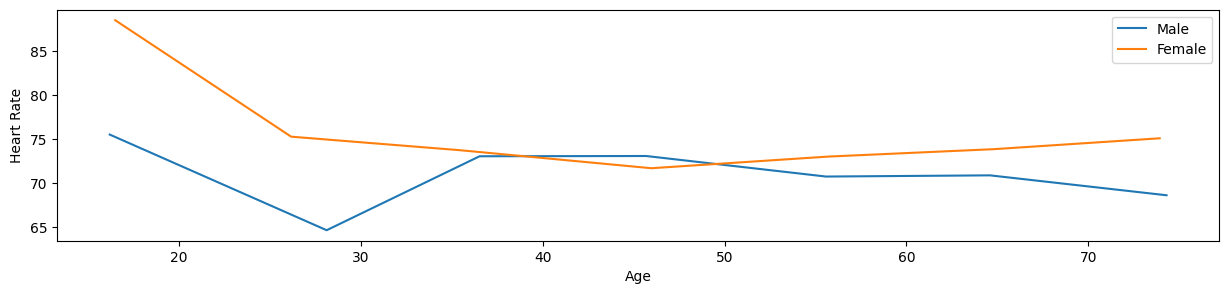

In [11]:
ax = df_m.plot(kind='line', x='Age', y='Heart Rate',figsize=(15,3), ylabel='Heart Rate')
df_f.plot(kind='line', x='Age', y='Heart Rate',figsize=(15,3), ax = ax)
ax.legend(['Male', 'Female'])

# Sampling (balanced dataset)

In [12]:
sample = data.sample(n=5)
sample

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,Heart Rate
42,30,1,160,62,92,154,346,158,96,54,48,64,52,91
198,13,1,133,30,96,176,356,171,137,102,-63,68,-10,96
429,8,1,130,24,77,125,358,159,70,87,55,16,76,80
177,27,1,155,55,77,205,345,144,149,66,19,56,49,67
142,49,0,166,73,95,157,383,163,92,-18,51,38,16,60


# Discretization

### Continuous-valued attribute (Heart rate) to a categorical attribute.

<Axes: >

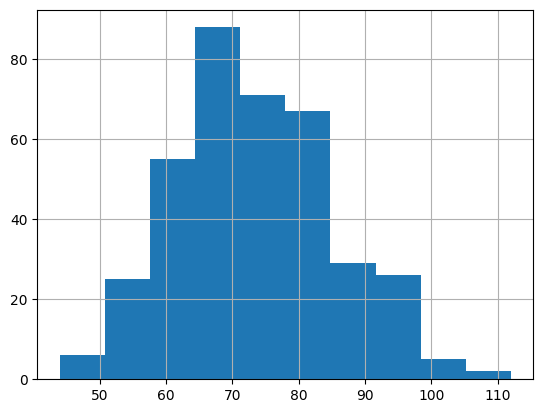

In [13]:
data['Heart Rate'].hist(bins=10)

# Dimentionatity reduction (PCA)

### predicting gender after reducing dimentions

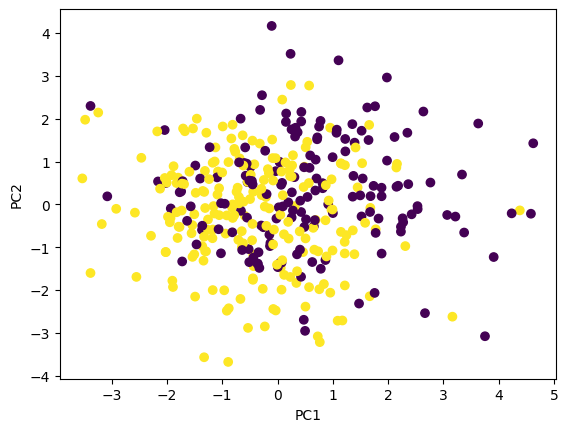

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy import stats

X = data.drop(['Sex'], axis=1)
y = data['Sex'].copy()

X = stats.zscore(X)

pca = PCA()
x_new = pca.fit_transform(X)

plt.scatter(x_new[:,1], x_new[:,2], c = y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Sample dataset (Unbalanced)

https://www.kaggle.com/crawford/emnist

In [16]:
csvdata = pd.read_csv('./emnist-byclass-test.csv', header=None)

npdata = np.array(csvdata)

df = DataFrame(npdata)

print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))
df.head()

Number of instances = 116323
Number of attributes = 785


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualising data distribution

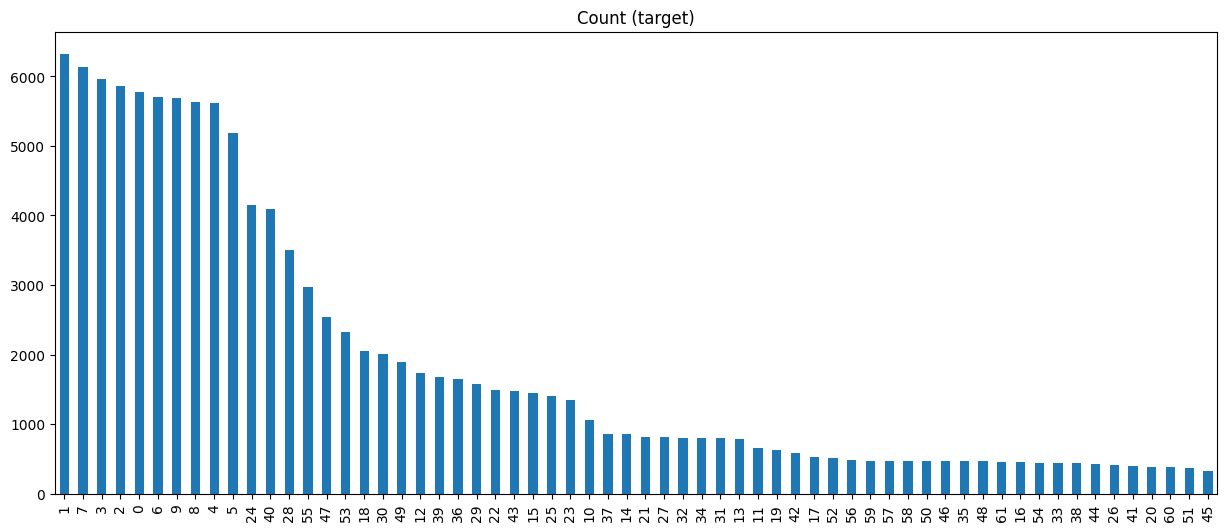

In [17]:
target_count = df[0].value_counts()
target_count.plot(kind='bar', title='Count (target)', figsize=(15,6));

### Mean distribution of data in different classes

In [18]:
mean_size = int(target_count.mean())
mean_size

1876

## Undersampling and oversampling

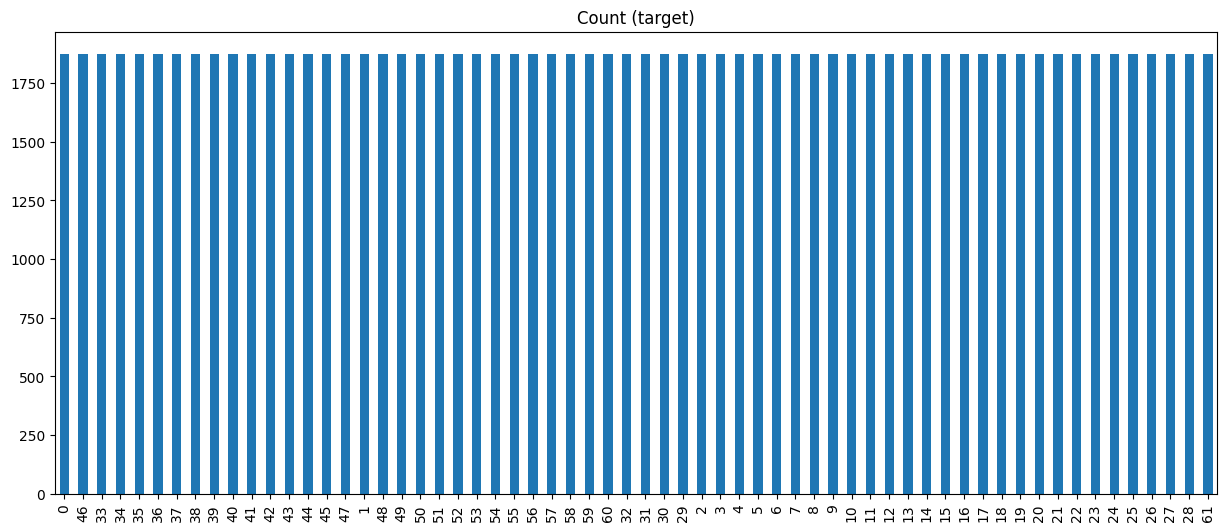

In [19]:
by_class = df.groupby(df.iloc[:, 0])
df_balanced = pd.DataFrame(columns=df.columns)

for groups, data in by_class:
    if data.shape[0] < mean_size :
        data = data.sample(mean_size, replace=True)
    elif data.shape[0] > mean_size :
        data = data.sample(mean_size)
    df_balanced = pd.concat([df_balanced, data], axis=0)

target_count = df_balanced[0].value_counts()
target_count.plot(kind='bar', title='Count (target)', figsize=(15,6));

# Dimentionality reduction (t-SNE)

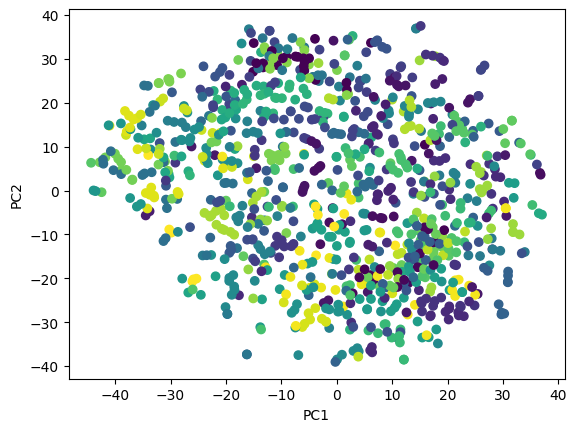

In [20]:
from sklearn.manifold import TSNE

df_new = df_balanced.sample(frac=1)
df_new = df_new.reset_index(drop=True)

labels = df_new.iloc[:, 0].copy()
df_new = df_new.drop(columns=df_balanced.columns[0], axis=1)

standardized_data = StandardScaler().fit_transform(df_new)

# TSNE
# Picking the top 1000 points as TSNE
data_1000 = standardized_data[0:1000, :]
labels_1000 = labels.iloc[0:1000]

model = TSNE(n_components = 2, random_state = 0, learning_rate='auto', init='random')
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000

tsne_data = model.fit_transform(data_1000)

# creating a new data frame which
# help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns =("Dim_1", "Dim_2", "label"))

# Plotting the result of tsne
plt.scatter(tsne_df['Dim_1'], tsne_df['Dim_2'], c = labels_1000)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
